# Geoscripting Exercise 12 GISRSArtists
## 22 January 2019

Imports

In [1]:
from geopy.geocoders import Nominatim
import rasterio
import rasterstats as rs
import matplotlib.pyplot as plt
from owslib.wcs import WebCoverageService
from owslib.wfs import WebFeatureService
from python.createBoundingBox import createBoundingBox
from python.writeGeotiffToFile import writeGeotiffToFile
from python.getGeotiffFromWebCoverageService import getGeotiffFromWebCoverageService
from python.getDataFromWebFeatureService import getDataFromWebFeatureService
from python.calculateBuildingVolume import calculateBuildingVolume
from python.visualizeBuildingVolume import visualizeBuildingVolume
from python.geocodePlacenameToCoordinates import geocodePlacenameToCoordinates
from python.reproject import reproject

In [2]:
# get coordinates of Wageningen and reproject to RD New
wageningen = geocodePlacenameToCoordinates('Wageningen University')
x, y = reproject(wageningen, '4326', '28992')
print("coordinates: " + str(x) + ", " + str(y))

# create bounding box around Wageningen
bbox = createBoundingBox(x, y)
print("bbox: " + str(bbox))

# get wcs of Wageningen
url = 'http://geodata.nationaalgeoregister.nl/ahn2/wcs?service=WCS'
version = '1.0.0'
direc = 'data'
frmt = 'GEOTIFF_FLOAT32'
getGeotiffFromWebCoverageService(url, version, bbox, 
                                 'ahn2_05m_ruw', frmt, direc, 'AHN2_05m_DSM')
getGeotiffFromWebCoverageService(url, version, bbox, 
                                 'ahn2_05m_int', frmt, direc, 'AHN2_05m_DTM')


coordinates: 173994.1578792833, 444133.60329471016
bbox: (173494.1578792833, 443633.60329471016, 174494.1578792833, 444633.60329471016)


/home/WUR/leens006/miniconda3/envs/rasterpython/lib/python3.7/site-packages/owslib/feature/wfs200.py:120: FutureWarning: The behavior of this method will change in future versions. Use specific 'len(elem)' or 'elem is not None' test instead.
  if serviceproviderelem:


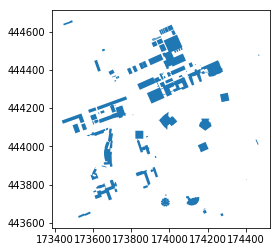

In [3]:
# get wfs of Wageningen
bgtURL = 'https://geodata.nationaalgeoregister.nl/beta/bgt/wfs'
bgtversion = '2.0.0'
typename = 'bgt:pand'
buildingsGDF = getDataFromWebFeatureService(bgtURL, bgtversion, bbox, typename)

%matplotlib inline 
buildingsGDF.plot() # pot to check if download succeeded

In [15]:
print(buildingsGDF.area.head())


0       8.619759
1    2365.662576
2    1906.590021
3     380.101205
4      12.450120
dtype: float64


In [4]:
# create heightmodel from difference DSM and DTM
DSM = rasterio.open("./data/AHN2_05m_DSM.tif", driver="GTiff")
DTM = rasterio.open("./data/AHN2_05m_DTM.tif", driver="GTiff")
buildingsHeight = DSM.read() - DTM.read()

# save to geotif
kwargs = DSM.meta # Copy metadata of rasterio.io.DatasetReader
writeGeotiffToFile(buildingsHeight, 'output', 'buildingsHeight', kwargs)

In [10]:
buildingsGDF.head()

,bronhouder,creationdate,eindregistratie,geometry,identificatiebagpnd,inonderzoek,inonderzoek_leeg,lokaalid,lv-publicatiedatum,plus-status,plus-status_codespace,plus-status_leeg,relatievehoogteligging,status,status_codespace,status_leeg,terminationdate,terminationdate_leeg,tijdstipregistratie
0,G0289,2015-04-14T22:00:00Z,None,"(POLYGON ((173979.275 443747.9, 173983.104 443...",0289100000025349,None,geenWaarde,G0289.0090f954c104401cb705cceb4d31270b,2017-07-19T14:39:29Z,None,http://www.geostandaarden.nl/imgeo/def/2.1#Voi...,geenWaarde,0,bestaand,http://www.geostandaarden.nl/imgeo/def/2.1#Status,None,None,geenWaarde,2015-08-10T10:01:48Z
1,G0289,2015-04-14T22:00:00Z,None,"(POLYGON ((173954.995 444483.734, 173888.732 4...",0289100000023273,None,geenWaarde,G0289.026379bd61b3480aaec80421e9db8b8f,2017-07-19T14:39:29Z,None,http://www.geostandaarden.nl/imgeo/def/2.1#Voi...,geenWaarde,0,bestaand,http://www.geostandaarden.nl/imgeo/def/2.1#Status,None,None,geenWaarde,2016-02-05T10:19:16Z
2,G0289,2015-06-29T22:00:00Z,None,"(POLYGON ((173829.796 443843.54, 173850.467 44...",0289100000024020,None,geenWaarde,G0289.02ce826e9e0e46fa9175c2896570a2a7,2017-07-19T14:39:29Z,None,http://www.geostandaarden.nl/imgeo/def/2.1#Voi...,geenWaarde,0,bestaand,http://www.geostandaarden.nl/imgeo/def/2.1#Status,None,None,geenWaarde,2015-12-01T11:00:38Z
3,G0289,2015-04-14T22:00:00Z,None,"(POLYGON ((174102.118 444427.872, 174109.147 4...",0289100000022407,None,geenWaarde,G0289.033b2d42fee6472ca7bed79c48c1f237,2017-07-19T14:39:29Z,None,http://www.geostandaarden.nl/imgeo/def/2.1#Voi...,geenWaarde,0,bestaand,http://www.geostandaarden.nl/imgeo/def/2.1#Status,None,None,geenWaarde,2015-12-09T16:09:07Z
4,G0289,2015-04-14T22:00:00Z,None,"(POLYGON ((173967.937 444386.696, 173970.31 44...",0289100000024097,None,geenWaarde,G0289.03ffdad6ac0c4d14ab053f6cc11d9220,2017-07-19T14:39:29Z,None,http://www.geostandaarden.nl/imgeo/def/2.1#Voi...,geenWaarde,0,bestaand,http://www.geostandaarden.nl/imgeo/def/2.1#Status,None,None,geenWaarde,2015-08-10T10:01:48Z


ValueError: too many values to unpack (expected 2)

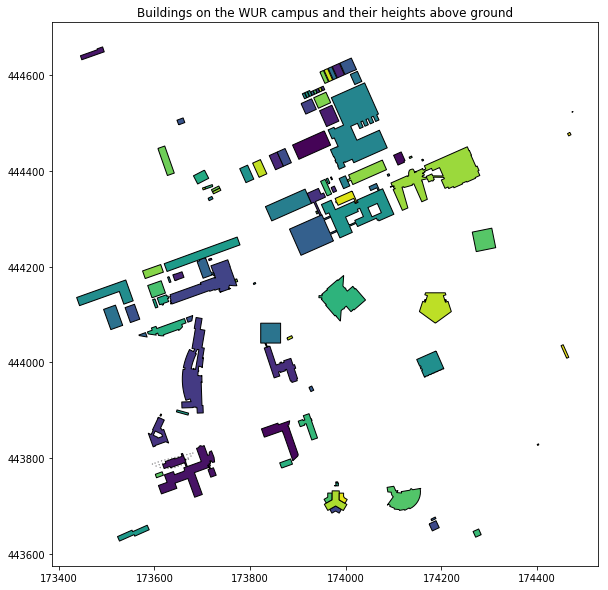

In [12]:
f, ax = plt.subplots(1, figsize=(10, 10))
ax.set_title('Buildings on the WUR campus and their heights above ground')
buildingsGDF.plot(ax=ax, scheme='fisher_jenks', k=6, 
                  cmap=plt.cm.viridis, linewidth=1, edgecolor='black', legend=True)
ax.annotate(buildingsGDF.area, buildingsGDF.centroid)  
ax.set_facecolor("lightgray") 
plt.axis('equal') 
plt.show() 

    

In [17]:
print(buildingsGDF.centroid)


0                 POINT (173981.1995 443749.0085)
1                 POINT (173928.4935 444454.0335)
2     POINT (173868.3533809608 443845.5281103961)
3     POINT (174112.2497966296 444426.0909514073)
4      POINT (173970.111155166 444384.5321773478)
5      POINT (173670.267521249 443770.6250328011)
6     POINT (173471.1475903631 444645.4535110296)
7                  POINT (173716.6815 444215.036)
8     POINT (173965.3774514042 444515.0053884396)
9     POINT (173984.4978190491 444609.6578962625)
10    POINT (173650.1454674616 444180.0158216538)
11    POINT (173854.9082442766 444420.9904115003)
12    POINT (173975.0398176477 444361.6139073066)
13    POINT (173865.1679749114 443991.8505219857)
14    POINT (173937.5974315462 444343.9690541922)
15    POINT (173608.2945614491 443850.8798808128)
16      POINT (173952.1688192255 444572.41889771)
17    POINT (173682.9771163132 443980.3357517779)
18           POINT (173941.402 444567.5910000001)
19                   POINT (173922.48 444534.786)
